# Spotify Music Analysis

data analysis 


In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.head(2)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,8,1921,0.4150,60.936,0.9630,1921
1,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",5,1921,0.0366,80.954,0.0594,1921


In [3]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168592.000000,168592.000000,1.685920e+05,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000
mean,0.501360,0.533648,2.327016e+05,0.488577,0.071516,0.169476,5.196795,0.205151,-11.358180,0.709446,31.626862,0.083616,116.918295,0.528497,1977.457774
std,0.377993,0.175919,1.223921e+05,0.267346,0.257685,0.315383,3.504587,0.175896,5.670176,0.454019,21.393260,0.119917,30.726527,0.264457,25.406757
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.097800,0.412000,1.721600e+05,0.265000,0.000000,0.000000,2.000000,0.098200,-14.388000,0.000000,13.000000,0.034800,93.500750,0.315000,1957.000000
50%,0.515000,0.543000,2.091330e+05,0.480000,0.000000,0.000264,5.000000,0.134000,-10.466000,1.000000,34.000000,0.044600,114.795000,0.539000,1978.000000
75%,0.896000,0.662000,2.637070e+05,0.709000,0.000000,0.111000,8.000000,0.259000,-7.135000,1.000000,48.000000,0.072300,135.733500,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000


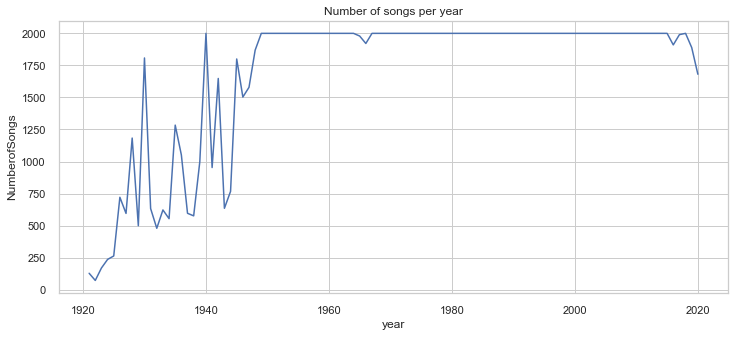

In [4]:
year_counts = df.groupby(["year"]).count()
year_counts = year_counts.reset_index()
year_counts["NumberofSongs"] = year_counts["artists"]


fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
sns.lineplot(x="year", y="NumberofSongs", data=year_counts, ax=ax)
ax.set_title("Number of songs per year")
plt.show()

#### How did the characteristics of the music change over the hundred years?

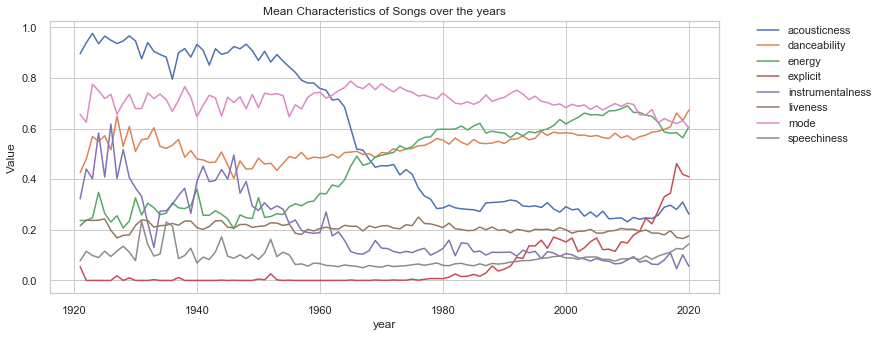

In [5]:
year_means = df.groupby(['year']).mean()
year_means = year_means.reset_index()


cols_to_show = ["acousticness", "danceability", "energy", "explicit", 
                "instrumentalness", "liveness", "mode", "speechiness"]

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for col in cols_to_show:
    ax = sns.lineplot(x="year", y=col, data= year_means, label=col)
ax.set_ylabel("Value")
ax.set_title("Mean Characteristics of Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The characteristics that are in the range of 0 and 1 are plotted in the above plot. The following points are oserved from the plot. These points are general as we are considering the mean values of all the characteristics in a given year.
* **Acousticness** has decreased during the 60's and 70's
* **Danceability** also remained in the same range only showing an increasing trend in the recent years
* **Energy** has increased considerably
* **Explicity** has remained near to zero until 80's and then started increasing
* **Instrumentalness** has decreased over the years and has a reducing trend (This might be due to the number of EDM's that we have now)
* **Liveness** has remained at the same level
* **Mode** remained almost the same over all the years
* **Speechiness** has also remained same, only showing an increasing trend in the recent years.

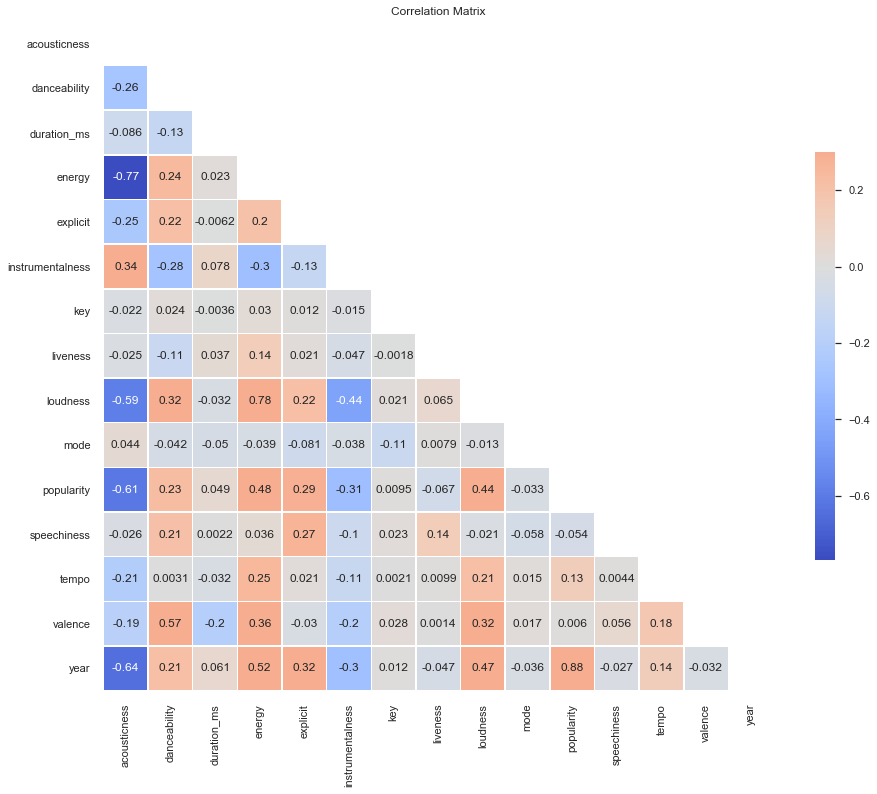

In [6]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
ax.set_title("Correlation Matrix")
plt.show()

### Music Characteristics

The pearson correlation coefficient between two variables gives the relation between two variables. 

* **Accousticness**: The measure of how acoustic the song is, has a strong negative correlation with **energy**(-0.77), **loudness**(-0.59), **popularity**(-0.61). This seems to be true as the definition of acoustic music - "Acoustic music is music that solely or primarily uses instruments that produce sound through acoustic means, as opposed to electric or electronic means."[[1]](https://g.co/kgs/pNWTC1) the latest songs use more electronic sources for music and the acousticness as seen in the previous plot was also coming down in the recent years.
* **Energy** - “is a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy” [[2]](https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de). It is also shown in the correlations as the **energy** is highly correlated with **loudness**(0.78), **popularity**(0.48).
* **Music** overall has become **popular** over the years since the popularity has a correlation on 0.88 with years.
* **Danceability** and **popularity** have a correlation of 0.23, indicating a positive correlation although not high.
* **Explicit** and **loudness** have a correlation 0.22, which again is not high but positive.

#### Did loudness of music increase noticeably over the past 100 years?

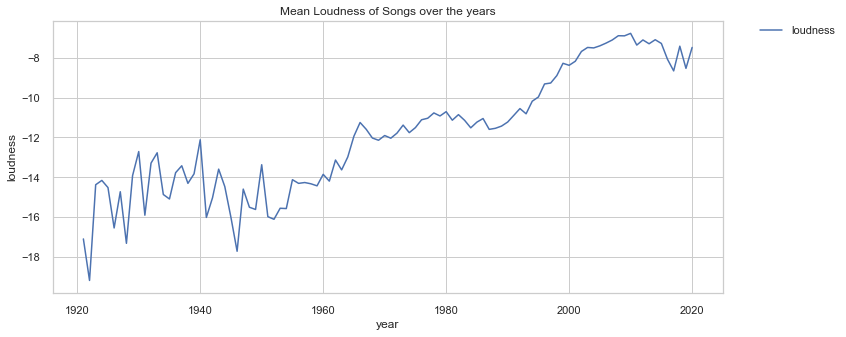

In [7]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax = sns.lineplot(x="year", y="loudness", data= year_means, label="loudness")
ax.set_title("Mean Loudness of Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Yes the loudness did increase in the last 100 years.


#### Did key change much over time?

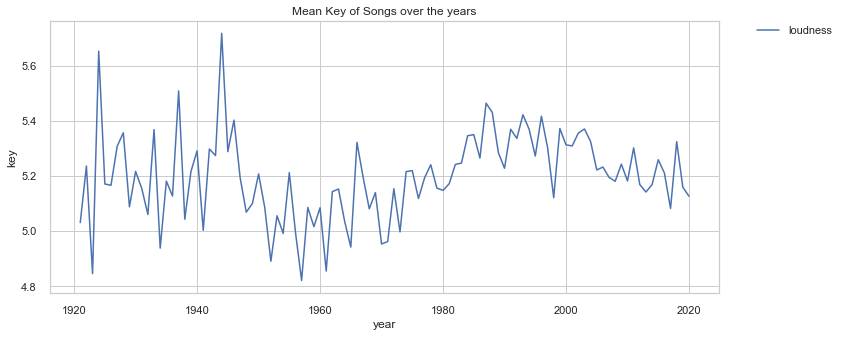

In [8]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax = sns.lineplot(x="year", y="key", data= year_means, label="loudness")
ax.set_title("Mean Key of Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The key appears to have not changed much over the time.

### Characteristics of Explicit Music

How did the music landscape change over the years in terms of explicity.

In [9]:
df.explicit.value_counts()

0    156535
1     12057
Name: explicit, dtype: int64

In [10]:
df_explicit = df[df["explicit"]==1]
df_non_explicit = df[df["explicit"]!=1]

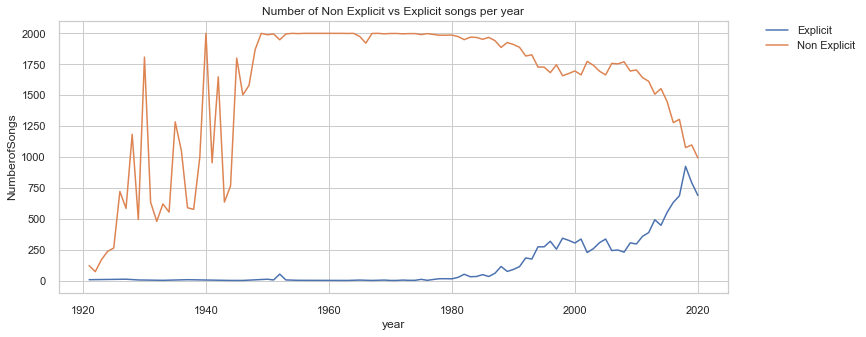

In [11]:
df_explicit_counts = df_explicit.groupby(["year"]).count()
df_explicit_counts = df_explicit_counts.reset_index()
df_explicit_counts["NumberofSongs"] = df_explicit_counts["artists"]

df_non_explicit_counts = df_non_explicit.groupby(["year"]).count()
df_non_explicit_counts = df_non_explicit_counts.reset_index()
df_non_explicit_counts["NumberofSongs"] = df_non_explicit_counts["artists"]


fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
sns.lineplot(x="year", y="NumberofSongs", data=df_explicit_counts, ax=ax, label="Explicit")
sns.lineplot(x="year", y="NumberofSongs", data=df_non_explicit_counts, ax=ax, label="Non Explicit")
ax.set_title("Number of Non Explicit vs Explicit songs per year")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The number of explicit songs per year has grown after the 80's. 

#### Mean characteristics of explicit music

In [12]:
year_means_explicit = df_explicit.groupby(['year']).mean()
year_means_explicit = year_means_explicit.reset_index()

year_means_non_explicit = df_non_explicit.groupby(['year']).mean()
year_means_non_explicit = year_means_non_explicit.reset_index()

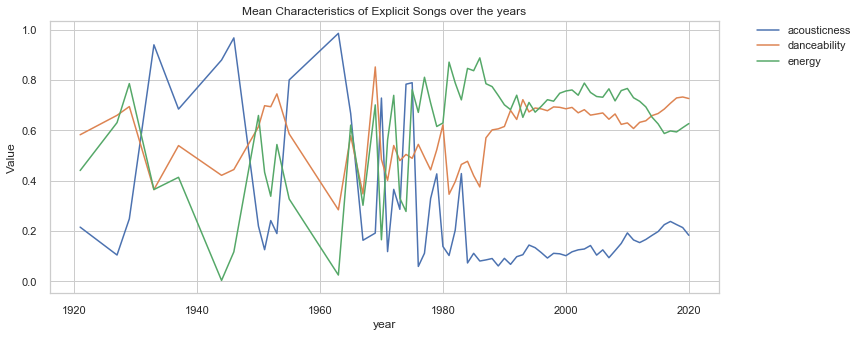

In [13]:
cols_to_show = ["acousticness", "danceability", "energy"]

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for col in cols_to_show:
    ax = sns.lineplot(x="year", y=col, data= year_means_explicit, label=col)
ax.set_ylabel("Value")
ax.set_title("Mean Characteristics of Explicit Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

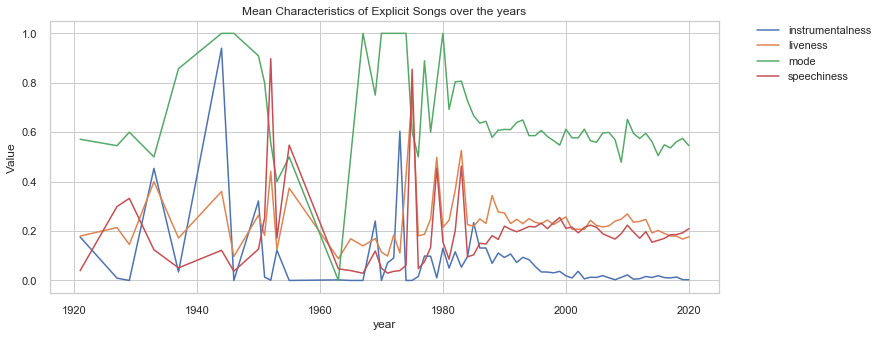

In [14]:
cols_to_show = ["instrumentalness", "liveness", "mode", "speechiness"]

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
for col in cols_to_show:
    ax = sns.lineplot(x="year", y=col, data= year_means_explicit, label=col)
ax.set_ylabel("Value")
ax.set_title("Mean Characteristics of Explicit Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Does a song being explicit contribute to popularity?

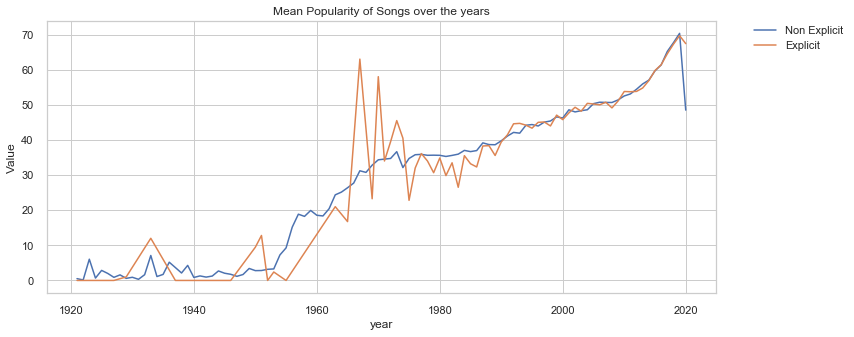

In [15]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax = sns.lineplot(x="year", y="popularity", data= year_means_non_explicit, label="Non Explicit")
ax = sns.lineplot(x="year", y="popularity", data= year_means_explicit, label="Explicit")
ax.set_ylabel("Value")
ax.set_title("Mean Popularity of Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The popularity of the non explicit and explicit songs have the same trend. The popularity for explicit songs has seen a rise in the 60's, which is surprising given the fact that the number of explicit songs during 60's was very less and the number started growing only after 80's.

#### Does a song being explicit contribute to loudness?

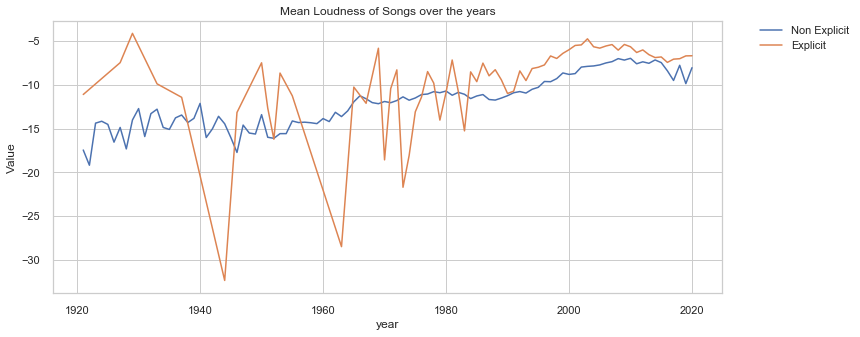

In [16]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax = sns.lineplot(x="year", y="loudness", data= year_means_non_explicit, label="Non Explicit")
ax = sns.lineplot(x="year", y="loudness", data= year_means_explicit, label="Explicit")
ax.set_ylabel("Value")
ax.set_title("Mean Loudness of Songs over the years")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The mean loudness of the explicit songs is slightly higher than the non explicit songs. Although there are less number of explicit songs when compared to non-explicit songs.